In [95]:
# import the libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [96]:
# import data 

df = pd.read_csv('Decision_tree_1.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,Male,19,19000.0,0
1,15810944.0,Male,35,20000.0,0
2,15668575.0,Female,26,43000.0,0
3,15603246.0,Female,27,57000.0,0
4,15804002.0,Male,19,76000.0,0
...,...,...,...,...,...
395,15691863.0,Female,46,41000.0,1
396,15706071.0,NaN,51,NaN,1
397,15654296.0,Female,50,20000.0,1
398,15755018.0,Male,36,33000.0,0


In [97]:
# check mising values

df.isnull().sum()

User ID            1
Gender             7
Age                0
EstimatedSalary    5
Purchased          0
dtype: int64

In [98]:
# count of the gender columns 

df.Gender.value_counts()

Female    202
Male      191
Name: Gender, dtype: int64

In [99]:
df.dropna(inplace = True)

In [100]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,Male,19,19000.0,0
1,15810944.0,Male,35,20000.0,0
2,15668575.0,Female,26,43000.0,0
3,15603246.0,Female,27,57000.0,0
4,15804002.0,Male,19,76000.0,0
...,...,...,...,...,...
394,15757632.0,Female,39,59000.0,0
395,15691863.0,Female,46,41000.0,1
397,15654296.0,Female,50,20000.0,1
398,15755018.0,Male,36,33000.0,0


In [101]:
# convert gender column 

from sklearn.preprocessing import LabelEncoder

In [102]:
gender_le = LabelEncoder()

In [103]:
df['Gender'] = gender_le.fit_transform(df['Gender'])

In [104]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,1,19,19000.0,0
1,15810944.0,1,35,20000.0,0
2,15668575.0,0,26,43000.0,0
3,15603246.0,0,27,57000.0,0
4,15804002.0,1,19,76000.0,0
...,...,...,...,...,...
394,15757632.0,0,39,59000.0,0
395,15691863.0,0,46,41000.0,1
397,15654296.0,0,50,20000.0,1
398,15755018.0,1,36,33000.0,0


In [105]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [106]:
# seperate Feature and columns 

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [107]:
# split the data 

from sklearn.model_selection import train_test_split

In [108]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 1)

In [109]:
len(X_train),len(y_train)

(310, 310)

In [110]:
len(X_test),len(y_test)

(78, 78)

In [111]:
# create model

from sklearn import tree

In [112]:
model = tree.DecisionTreeClassifier()

In [113]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [114]:
yp = model.predict(X_test)

In [115]:
model.score(X_test,y_test)*100

88.46153846153845

In [116]:
model.score(X_train,y_train)*100

100.0

[Text(183.36907894736842, 207.55636363636364, 'X[2] <= 44.5\ngini = 0.458\nsamples = 310\nvalue = [200, 110]'),
 Text(90.30789473684212, 187.7890909090909, 'X[3] <= 91500.0\ngini = 0.289\nsamples = 228\nvalue = [188, 40]'),
 Text(35.242105263157896, 168.0218181818182, 'X[2] <= 36.5\ngini = 0.081\nsamples = 190\nvalue = [182, 8]'),
 Text(26.431578947368422, 148.25454545454545, 'gini = 0.0\nsamples = 128\nvalue = [128, 0]'),
 Text(44.05263157894737, 148.25454545454545, 'X[3] <= 83500.0\ngini = 0.225\nsamples = 62\nvalue = [54, 8]'),
 Text(35.242105263157896, 128.48727272727274, 'X[0] <= 15575072.5\ngini = 0.18\nsamples = 60\nvalue = [54, 6]'),
 Text(26.431578947368422, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(44.05263157894737, 108.72, 'X[3] <= 74000.0\ngini = 0.155\nsamples = 59\nvalue = [54, 5]'),
 Text(26.431578947368422, 88.95272727272729, 'X[2] <= 37.5\ngini = 0.048\nsamples = 41\nvalue = [40, 1]'),
 Text(17.621052631578948, 69.18545454545455, 'X[0] <= 15750391.0\ng

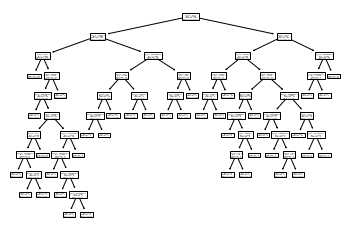

In [117]:
tree.plot_tree(model)

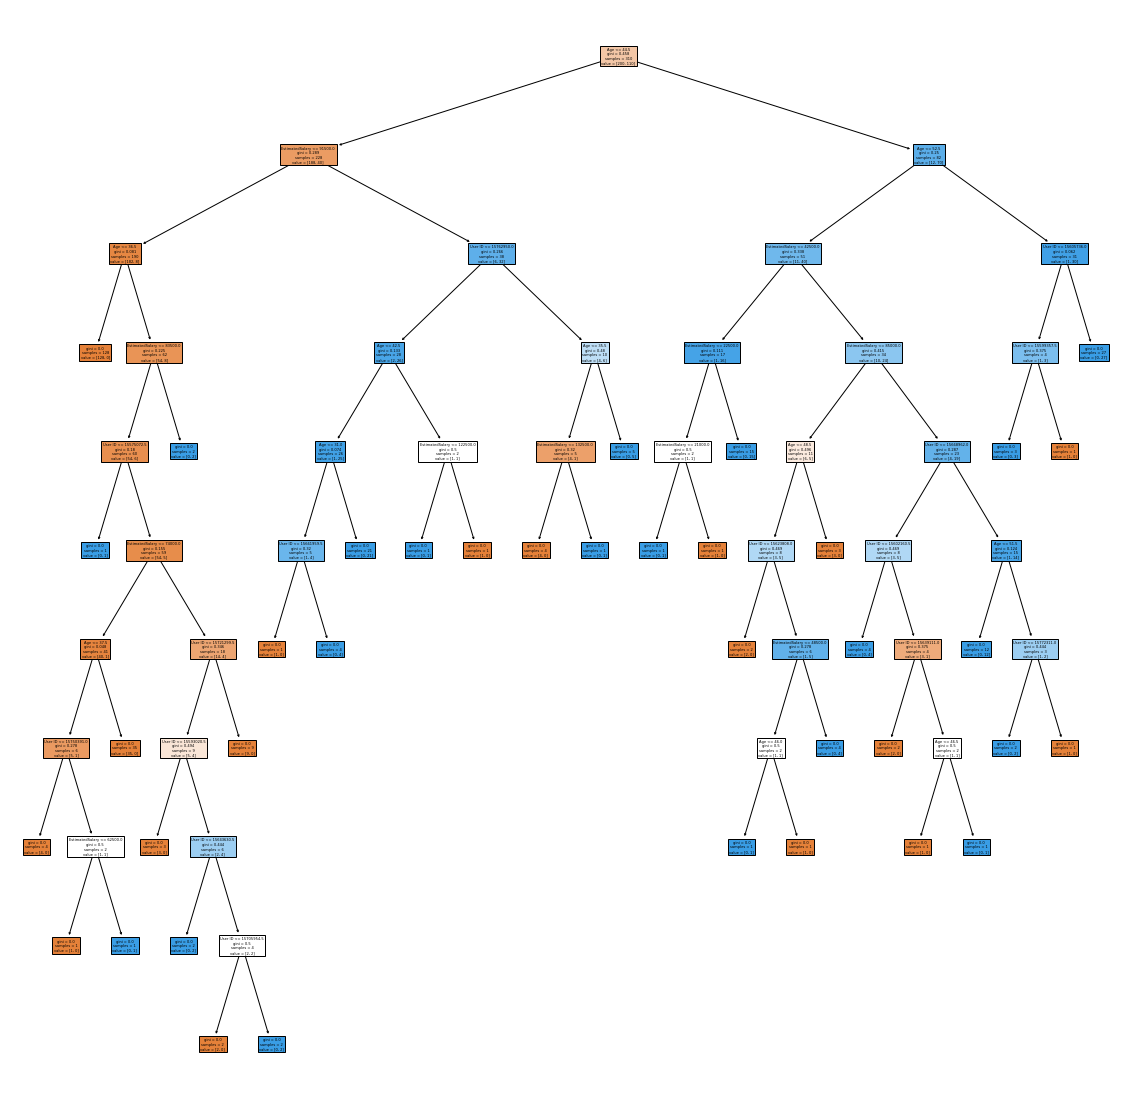

In [122]:
fig = plt.figure(figsize = (20,20))

f = tree.plot_tree(model , feature_names = X.columns , filled = True )

plt.savefig("Decision Tree.png")